### Import necessity libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load loan dataset

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### EDA and Feature Engineering

In [3]:
#check class imbalance or not (good between 50% 50%)
dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

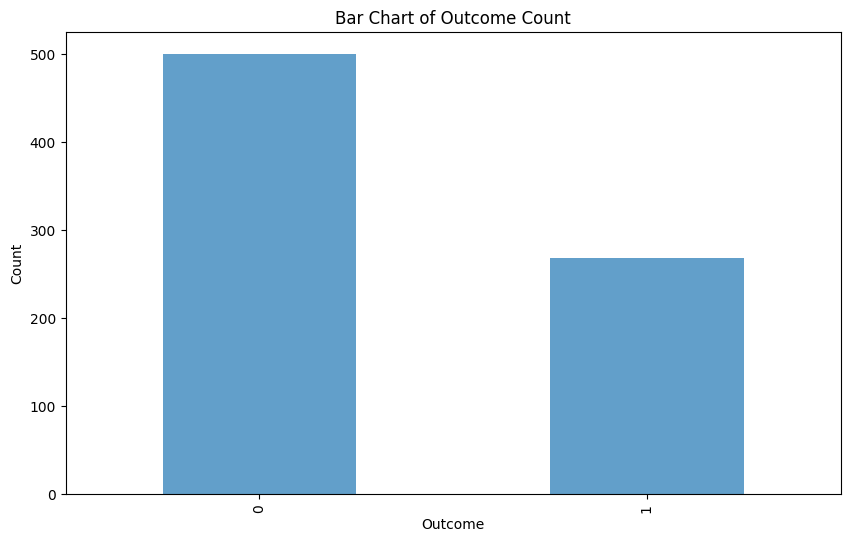

In [4]:
plt.figure(figsize=(10, 6))
df_outcome_count = dataset['Outcome'].value_counts()
df_outcome_count.plot(kind='bar', alpha=0.7)
plt.ylabel('Count')
plt.xlabel('Outcome')
plt.title('Bar Chart of Outcome Count')
plt.show()

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Data preparation

In [8]:
X = dataset.drop(['Outcome'],axis=1).values #dataset.iloc[:, :-1].values  #must in numpy.ndarray type
y = dataset['Outcome'].values  #dataset.iloc[:, -1].values #dataset.Outcome.values 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

### Model building

In [11]:
# import Machine Learning library:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

## use for evaluation
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors=3) 
rfc = RandomForestClassifier(max_depth=3, random_state=1) 
lc = LogisticRegression() 
nb = GaussianNB()


# making predictions on the testing set and find accuracy score
for clf in (rfc, knn, lc, nb): 
	clf.fit(X_train, y_train) 
	y_pred = clf.predict(X_test) 
	print("Accuracy score of ", clf.__class__.__name__,"=", round(100*accuracy_score(y_test, y_pred),2), "%")

Accuracy score of  RandomForestClassifier = 78.12 %
Accuracy score of  KNeighborsClassifier = 73.96 %
Accuracy score of  LogisticRegression = 77.6 %
Accuracy score of  GaussianNB = 79.17 %


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


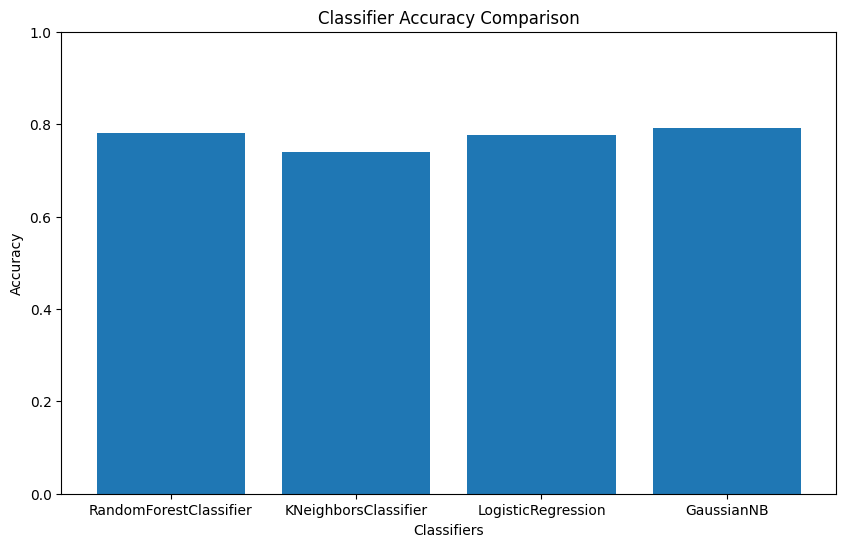

In [12]:
classifiers = [rfc, knn, lc, nb]
accuracy_scores = []

# Making predictions on the testing set and finding accuracy score
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar([clf.__class__.__name__ for clf in classifiers], accuracy_scores)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

In [13]:
def print_summary(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)

    # Classification report
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {classifier.__class__.__name__}:\n{report}")

# Using the function for each classifier
for clf in classifiers:
    clf.fit(X_train, y_train)
    print_summary(clf, X_test, y_test)

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       123
           1       0.78      0.55      0.64        69

    accuracy                           0.78       192
   macro avg       0.78      0.73      0.74       192
weighted avg       0.78      0.78      0.77       192

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       123
           1       0.65      0.59      0.62        69

    accuracy                           0.74       192
   macro avg       0.72      0.71      0.71       192
weighted avg       0.74      0.74      0.74       192

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.74      0.58      0.65        69

    accuracy                          

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


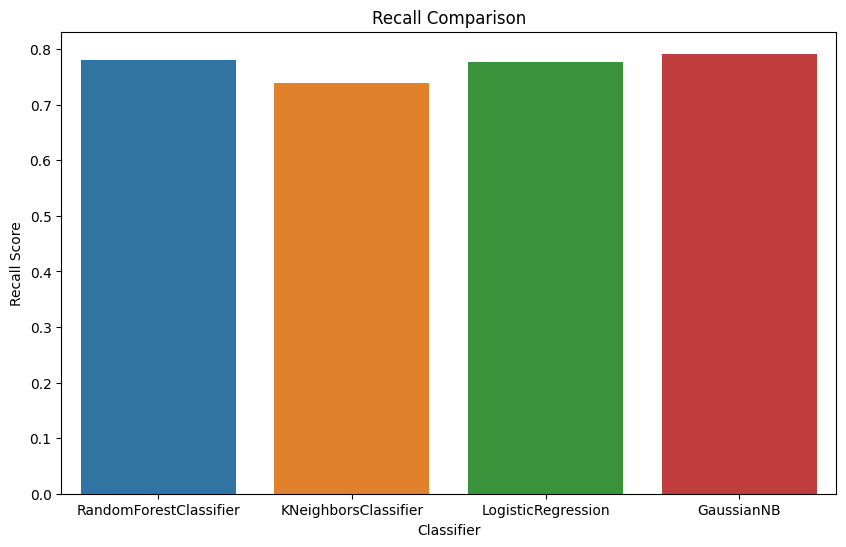

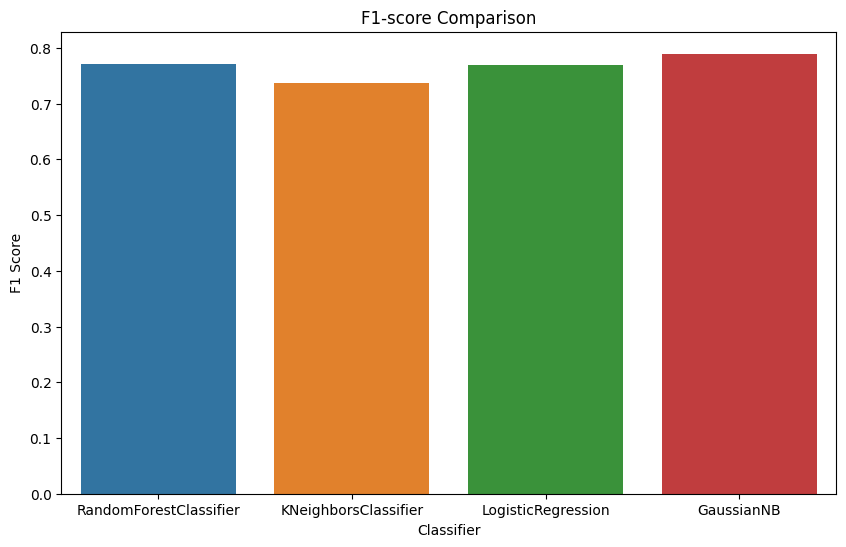

In [14]:
classifiers = [rfc, knn, lc, nb]

# Lists to store metric values
recall_scores = []
f1_scores = []
classifiers_names = []

# Loop through each classifier
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate precision, recall, and F1-score
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall_scores.append(recall)
    f1_scores.append(f1)
    classifiers_names.append(clf.__class__.__name__)

# Creating separate grouped bar charts for each metric
metrics_df = pd.DataFrame({
    'Classifier': classifiers_names,
    'Recall': recall_scores,
    'F1': f1_scores
})

# Plotting recall
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='Recall', data=metrics_df)
plt.title('Recall Comparison')
plt.ylabel('Recall Score')
plt.show()

# Plotting F1-score
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='F1', data=metrics_df)
plt.title('F1-score Comparison')
plt.ylabel('F1 Score')
plt.show()

### Finnal select Algorithm (NB)

In [15]:
nb.fit(X_train, y_train)

GaussianNB()

In [16]:
y_pred = nb.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [17]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

### Evaluation

In [18]:
# Calculate accuracy score (how many percent that our algorithm classify correctly)
score = accuracy_score(y_test, y_pred)
score

0.7916666666666666

In [19]:
#Validate new data input

nb.predict([[6, 148, 72, 35, 0, 33.6, 0.62, 50]])[0]

1

### Save Model

In [20]:
# #using pickle to save trained medel and use later
import pickle

filename = 'finalized_model.pkl'

# Assume 'nb' is your trained model
# Save the model to disk
pickle.dump(nb, open(filename, 'wb'))

In [21]:
# # Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

loaded_model.predict([[6, 148, 72, 35, 0, 33.6, 0.62, 50]])[0]

1